# Analisis de Imagen

Saving colores.jpg to colores.jpg


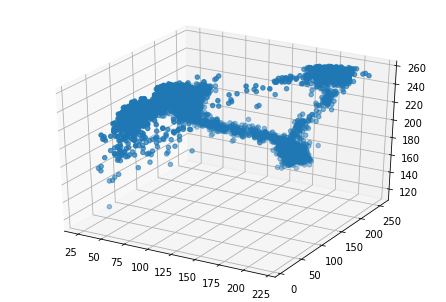

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np

from google.colab import files
uploaded = files.upload()
import io

#Lectura de la imagen
img = cv2.imread('colores.jpg')

#Convertir de BGR a RGB
r, g, b = cv2.split (img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r,g,b)
plt.show()

Saving colores.jpg to colores (16).jpg
[[232  34  66]
 [166 210 151]
 [199 190  52]
 [252 236 176]
 [238 100  69]]


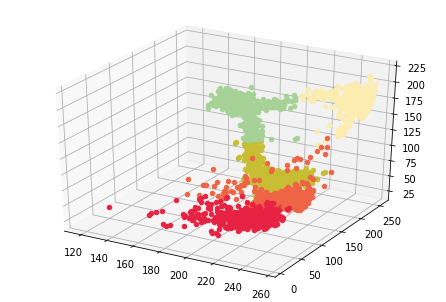

55.8 	 * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

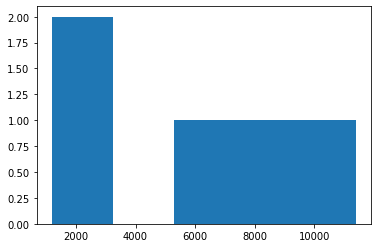

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2
from sklearn.cluster import KMeans

class ColoresDominates:
  CLUSTERS = None
  IMAGE = None
  COLORES = None
  LABELS = None

  def __init__(self, image, clusters=3):
    self.CLUSTERS = clusters
    self.IMAGE = image
  
  def dominatesColores (self):
    #Convertir de bgr a rgb
    img = cv2.cvtColor(self.IMAGE, cv2.COLOR_BGR2RGB)

    #Formar la lista de pixeles
    img = img.reshape ((img.shape[0]*img.shape[1],3))

    #Guardar la imagen
    self.IMAGE = img

    #Uso de kameans para agrupar por pixeles
    kmeans = KMeans (n_clusters = self.CLUSTERS)
    kmeans.fit (img)

    #Los centros de los clusters son los colores dominates
    self.COLORES = kmeans.cluster_centers_

    #Se guardan las etiquetas
    self.LABELS = kmeans.labels_

    #Se regresa convertido de real a int
    return self.COLORES.astype(int)
  #Visualizacion
  def rgb2Hex (self, rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

  def plotClusters (self):
    fig = plt.figure()
    ax = Axes3D (fig)
    for label, pix in zip(self.LABELS, self.IMAGE):
      ax.scatter(pix[0], pix[1], pix[2], color = self.rgb2Hex(self.COLORES[label]))
    plt.show()

  def plotHist(self):
    #Calcula las frecuencias en bins
    frec, bins = np.histogram(self.IMAGE, bins=5)
    #impresion
    for b, f in zip(bins[1:], frec):
      print(round(b,1),'\t',' '.join(np.repeat('*',f)))
    plt.hist(frec, bins=5)

#lectura de la imagen
from google.colab import files
uploaded = files.upload()
img = cv2.imread('colores.jpg')

clusters = 5
dom = ColoresDominates(img,clusters)
colores = dom.dominatesColores()
print(colores)
dom.plotClusters()
dom.plotHist()

### pequeño ejemplo de un histograma de frecuencias

10.0 	 * * * * * * * *
20.0 	 * * * * * * * *
30.0 	 * * * * * * * * * * * * *
40.0 	 * * * * *
50.0 	 * * * * * * * * * * * * *
60.0 	 * * * * * * * *
70.0 	 * * * * * * *
80.0 	 * * * * * * * * * * * * * * * * * * * * * *
90.0 	 * * * * * * * * * *
100.0 	 * * * * * *


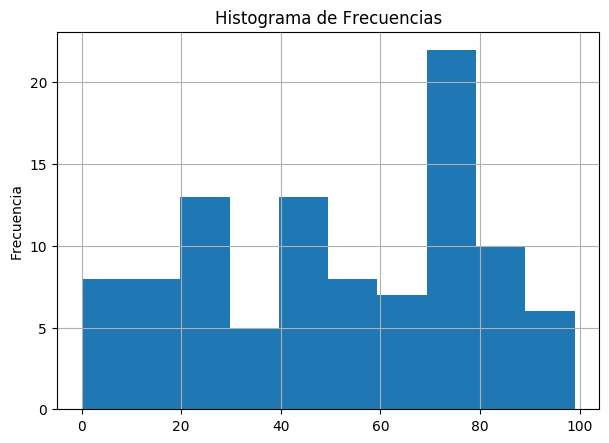

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint (low=0, high=100, size=100)
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#Calcula las frecuencias en bins
frec, bins = np.histogram(x, bins=10, range=[0,100])

#impresion
for b, f in zip(bins[1:], frec):
  print(round(b,1),'\t',' '.join(np.repeat('*',f)))
plt.hist(x, bins=10)
plt.gca().set(title='Histograma de Frecuencias', ylabel='Frecuencia')
plt.grid(True)